<a href="https://colab.research.google.com/github/holoho/ai_14_section1/blob/main/AI14_%EC%9D%B4%EB%8F%99%EA%B7%9C_section4_%EC%B4%88%EC%9D%8C%ED%8C%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install keras==2.4.3
#!pip uninstall tensorflow
#!pip install tensorflow==2.7

In [ ]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from tqdm import tqdm
from keras.layers import BatchNormalization
import pandas as pd
image_directory = '/content/drive/MyDrive/AI/section4/project/chunan'
df = pd.read_excel('/content/drive/MyDrive/AI/section4/project/안성농가종합초음파판독결과.xls', index_col=None) 
data = pd.read_excel('/content/drive/MyDrive/AI/section4/project/천안초음파판독자료.xls', index_col=None) 
dfa = pd.read_excel('/content/drive/MyDrive/AI/section4/project/안성농가종합초음파판독결과.xls', sheet_name='Sheet1', header=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  import sys


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   일련번호         77 non-null     float64       
 1   축주           431 non-null    object        
 2   개체식별번호       431 non-null    object        
 3   소의종류         431 non-null    object        
 4   성별           431 non-null    object        
 5   출생일자         431 non-null    object        
 6   Unnamed: 6   0 non-null      float64       
 7   Unnamed: 7   0 non-null      float64       
 8   Unnamed: 8   0 non-null      float64       
 9   Unnamed: 9   0 non-null      float64       
 10  Unnamed: 10  0 non-null      float64       
 11  Unnamed: 11  0 non-null      float64       
 12  개월령          428 non-null    float64       
 13  모 개체식별번호     255 non-null    object        
 14  상태           431 non-null    object        
 15  측정일자         431 non-null    datetime64[ns]
 16  비고      

In [ ]:
df = df.loc[:, ['개체식별번호','개월령','흉위','BCS']]

In [ ]:
df

,개체식별번호,개월령,흉위,BCS
0,002 0126 8860 3,26.0,160.0,4.0
1,002 0289 0918 1,28.0,161.0,5.0
2,002 0183 2811 4,39.0,162.0,4.0
3,002 0369 4082 8,31.0,163.0,4.0
4,002 0369 4245 6,31.0,164.0,4.0
...,...,...,...,...
427,KOR-002-036941937,32.0,186.0,4.0
428,KOR-002-018331994,40.0,196.0,4.0
429,KOR-002-018314853,45.0,197.0,4.0
430,KOR-002-008659932,42.0,200.0,5.0


In [ ]:
dfa

,no,herd,barcode,bdate,mdate,age,cg,bcs,EMA1,BF1,...,BF,MS,MS.1,EMA.1,BF.1,MS.2,EMA.2,BF.2,MS.3,지수값
0,1,이석구,KOR-000-192805636,2006-01-16,2011-07-08,65.648604,190,5.0,54.1786,0.386266,...,0.386266,5.0,22.0,61.445953,0.527947,5.610771,-7.479203,-0.141681,-0.610771,-671.593409
1,2,이석구,KOR-000-193495072,2005-01-25,2011-07-08,77.339901,189,5.0,56.4921,0.257511,...,0.257511,5.0,22.0,61.771548,0.552792,5.649111,-5.120098,-0.295281,-0.649111,-645.582069
2,3,이석구,KOR-000-196674894,2006-07-18,2011-07-08,59.638752,202,5.0,53.3699,0.386266,...,0.386266,8.0,32.0,61.208729,0.514046,5.574862,-7.695129,-0.127780,2.425138,2035.188219
3,4,이석구,KOR-000-196822073,2005-01-01,2011-07-08,78.128079,187,5.0,54.7680,0.515021,...,0.515021,5.0,22.0,61.788467,0.554366,5.650732,-7.130967,-0.039345,-0.650732,-711.349701
4,5,이석구,KOR-000-196822080,2005-01-01,2011-07-08,78.128079,188,5.0,55.5011,0.100000,...,0.100000,5.0,22.0,61.788467,0.554366,5.650732,-6.343517,-0.454366,-0.650732,-653.549465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,36,심현두,KOR-002053373608,2010-06-17,2011-11-10,16.781609,172,4.0,46.8327,0.214592,...,0.214547,NaN,NaN,56.221472,0.390880,3.778110,-9.640222,-0.176333,NaN,NaN
553,37,심현두,KOR-002055712550,2010-07-11,2011-11-10,15.993432,158,4.0,39.2713,0.300429,...,0.300429,NaN,NaN,56.030749,0.388216,3.684474,-17.247549,-0.087787,NaN,NaN
554,38,심현두,KOR-002055712568,2010-07-04,2011-11-10,16.223317,165,4.0,45.3094,0.429185,...,0.429185,NaN,NaN,56.086962,0.388994,3.712161,-10.548262,0.040191,NaN,NaN
555,39,심현두,KOR-002057264171,2010-08-02,2011-11-10,15.270936,156,4.0,44.0642,0.257511,...,0.257511,NaN,NaN,55.850882,0.385761,3.595422,-11.786682,-0.128250,NaN,NaN


In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   no       557 non-null    int64         
 1   herd     557 non-null    object        
 2   barcode  557 non-null    object        
 3   bdate    557 non-null    datetime64[ns]
 4   mdate    557 non-null    datetime64[ns]
 5   age      557 non-null    float64       
 6   cg       557 non-null    int64         
 7   bcs      529 non-null    float64       
 8   EMA1     557 non-null    float64       
 9   BF1      557 non-null    float64       
 10  EMA2     318 non-null    float64       
 11  BF2      317 non-null    float64       
 12  EMA3     27 non-null     float64       
 13  BF3      26 non-null     float64       
 14  EMA      557 non-null    float64       
 15  BF       557 non-null    float64       
 16  MS       60 non-null     float64       
 17  MS.1     60 non-null     float64   

In [ ]:
dfa = dfa.loc[:, ['barcode','cg','EMA','BF','MS']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   순번         679 non-null    float64       
 1   농가명(목장명)   679 non-null    object        
 2   귀표번호/관리번호  679 non-null    object        
 3   월령         679 non-null    float64       
 4   성별         679 non-null    object        
 5   체중         679 non-null    float64       
 6   생년월일       679 non-null    datetime64[ns]
 7   측정일자       679 non-null    datetime64[ns]
 8   판독일자       679 non-null    datetime64[ns]
 9   등록일자       679 non-null    datetime64[ns]
 10  측정자        679 non-null    object        
 11  등지방        680 non-null    object        
 12  등심         680 non-null    object        
 13  근내         680 non-null    object        
 14  예상         680 non-null    object        
 15  예상.1       680 non-null    object        
dtypes: datetime64[ns](4), float64(3), object(9)


In [ ]:
data

,순번,농가명(목장명),귀표번호/관리번호,월령,성별,체중,생년월일,측정일자,판독일자,등록일자,측정자,등지방,등심,근내,예상,예상.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,두께,단면적,지방도,육량,육질
1,1.0,고세영(고세영),KOR-002-054983848,25.0,암,400.0,2010-06-10,2012-07-20,2012-07-20,2012-07-20,정길제,3.79,61.18,21,A,2
2,2.0,곽태송(곽태송),KOR-002-054981457,26.0,암,400.0,2010-06-20,2012-08-06,2012-08-06,2012-08-06,정길제,5.85,70.62,21,A,2
3,3.0,곽태송(곽태송),KOR-002-022005104,45.0,암,580.0,2008-07-27,2012-05-25,2012-05-29,2012-05-25,정길제,12.96,70.04,43,B,1
4,4.0,곽태송(곽태송),KOR-002-052587994,24.0,암,410.0,2010-05-05,2012-05-25,2012-05-25,2012-05-25,정길제,3.37,48.42,13,A,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,675.0,황민석(황민석),KOR-000-144626639,79.0,암,460.0,2010-06-29,2012-03-29,2012-03-29,2012-03-29,정길제,19.65,80.99,62,B,1+
676,676.0,황민석(황민석),KOR-002-028916404,54.0,암,450.0,2010-06-29,2012-03-29,2012-03-29,2012-03-29,정길제,9.62,68.99,13,A,3
677,677.0,황민석(황민석),KOR-000-189396680,74.0,암,450.0,2010-06-29,2012-03-29,2012-03-29,2012-03-29,정길제,8.36,78.16,31,A,2
678,678.0,황민석(황민석),KOR-000-189406952,76.0,암,470.0,2010-06-29,2012-03-29,2012-03-29,2012-03-29,정길제,8.78,74.98,21,A,2


In [ ]:
data =data.loc[:, ['귀표번호/관리번호','월령','체중','등지방','등심','근내','예상','예상.1']]

In [ ]:
data1 = data.drop(0)

In [ ]:
data1

,귀표번호/관리번호,월령,체중,등지방,등심,근내,예상,예상.1
1,KOR-002-054983848,25.0,400.0,3.79,61.18,21,A,2
2,KOR-002-054981457,26.0,400.0,5.85,70.62,21,A,2
3,KOR-002-022005104,45.0,580.0,12.96,70.04,43,B,1
4,KOR-002-052587994,24.0,410.0,3.37,48.42,13,A,3
5,KOR-002-052588001,24.0,430.0,4.18,50.66,13,A,3
...,...,...,...,...,...,...,...,...
675,KOR-000-144626639,79.0,460.0,19.65,80.99,62,B,1+
676,KOR-002-028916404,54.0,450.0,9.62,68.99,13,A,3
677,KOR-000-189396680,74.0,450.0,8.36,78.16,31,A,2
678,KOR-000-189406952,76.0,470.0,8.78,74.98,21,A,2


In [ ]:
df.columns = ['Id','월령','흉위','BCS']
data1.columns = ['Id','월령','체중','등지방두께','등심단면적','근내지방도','예상육량','예상육질']
dfa.columns = ['Id','흉위','등심단면적','등지방두께','근내지방도']

In [ ]:
dfA =df.copy()

In [ ]:
dfC= data1.copy()

In [ ]:
dfA

,Id,월령,흉위,BCS
0,002 0126 8860 3,26.0,160.0,4.0
1,002 0289 0918 1,28.0,161.0,5.0
2,002 0183 2811 4,39.0,162.0,4.0
3,002 0369 4082 8,31.0,163.0,4.0
4,002 0369 4245 6,31.0,164.0,4.0
...,...,...,...,...
427,KOR-002-036941937,32.0,186.0,4.0
428,KOR-002-018331994,40.0,196.0,4.0
429,KOR-002-018314853,45.0,197.0,4.0
430,KOR-002-008659932,42.0,200.0,5.0


In [ ]:
dfA['Id'] = dfA['Id'].str.replace(r'[^0-9]+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
dfA

,Id,월령,흉위,BCS
0,002012688603,26.0,160.0,4.0
1,002028909181,28.0,161.0,5.0
2,002018328114,39.0,162.0,4.0
3,002036940828,31.0,163.0,4.0
4,002036942456,31.0,164.0,4.0
...,...,...,...,...
427,002036941937,32.0,186.0,4.0
428,002018331994,40.0,196.0,4.0
429,002018314853,45.0,197.0,4.0
430,002008659932,42.0,200.0,5.0


In [ ]:
dfa['Id'] = dfa['Id'].str.replace(r'[^0-9]+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
dfa

,Id,흉위,등심단면적,등지방두께,근내지방도
0,000192805636,190,53.96675,0.386266,5.0
1,000193495072,189,56.65145,0.257511,5.0
2,000196674894,202,53.51360,0.386266,8.0
3,000196822073,187,54.65750,0.515021,5.0
4,000196822080,188,55.44495,0.100000,5.0
...,...,...,...,...,...
552,002053373608,172,46.58125,0.214547,NaN
553,002055712550,158,38.78320,0.300429,NaN
554,002055712568,165,45.53870,0.429185,NaN
555,002057264171,156,44.06420,0.257511,NaN


In [ ]:
dfaa = pd.merge(dfa, dfA, on=['Id', '흉위'])

In [ ]:
dfaa

,Id,흉위,등심단면적,등지방두께,근내지방도,월령,BCS
0,000192805636,190,53.96675,0.386266,5.0,67.0,5.0
1,000193495072,189,56.65145,0.257511,5.0,78.0,5.0
2,000196674894,202,53.51360,0.386266,8.0,61.0,5.0
3,000196822073,187,54.65750,0.515021,5.0,79.0,5.0
4,000196822080,188,55.44495,0.100000,5.0,79.0,5.0
...,...,...,...,...,...,...,...
424,002048475506,168,36.55070,0.100000,NaN,22.0,4.0
425,002051541183,178,55.43660,0.643777,NaN,17.0,5.0
426,002051541222,184,44.14150,0.901288,NaN,17.0,4.0
427,002057270203,165,47.14580,0.472103,NaN,12.0,4.0


In [ ]:
dfaa['Id'] = dfaa['Id'].map('KOR{}'.format)

In [ ]:
dfaa['Id'] = dfaa['Id'].map('{}.jpg'.format)

In [ ]:
dfaa

,Id,흉위,등심단면적,등지방두께,근내지방도,월령,BCS
0,KOR000192805636.jpg,190,53.96675,0.386266,5.0,67.0,5.0
1,KOR000193495072.jpg,189,56.65145,0.257511,5.0,78.0,5.0
2,KOR000196674894.jpg,202,53.51360,0.386266,8.0,61.0,5.0
3,KOR000196822073.jpg,187,54.65750,0.515021,5.0,79.0,5.0
4,KOR000196822080.jpg,188,55.44495,0.100000,5.0,79.0,5.0
...,...,...,...,...,...,...,...
424,KOR002048475506.jpg,168,36.55070,0.100000,NaN,22.0,4.0
425,KOR002051541183.jpg,178,55.43660,0.643777,NaN,17.0,5.0
426,KOR002051541222.jpg,184,44.14150,0.901288,NaN,17.0,4.0
427,KOR002057270203.jpg,165,47.14580,0.472103,NaN,12.0,4.0


In [ ]:
dfaa.to_csv('anseong.csv')

In [ ]:
dfC

,Id,월령,체중,등지방두께,등심단면적,근내지방도,예상육량,예상육질
1,KOR-002-054983848,25.0,400.0,3.79,61.18,21,A,2
2,KOR-002-054981457,26.0,400.0,5.85,70.62,21,A,2
3,KOR-002-022005104,45.0,580.0,12.96,70.04,43,B,1
4,KOR-002-052587994,24.0,410.0,3.37,48.42,13,A,3
5,KOR-002-052588001,24.0,430.0,4.18,50.66,13,A,3
...,...,...,...,...,...,...,...,...
675,KOR-000-144626639,79.0,460.0,19.65,80.99,62,B,1+
676,KOR-002-028916404,54.0,450.0,9.62,68.99,13,A,3
677,KOR-000-189396680,74.0,450.0,8.36,78.16,31,A,2
678,KOR-000-189406952,76.0,470.0,8.78,74.98,21,A,2


In [ ]:
# 개체번호만 남기기
dfC['Id'] = dfC['Id'].str.replace(r'[^0-9]+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
dfC

,Id,월령,체중,등지방두께,등심단면적,근내지방도,예상육량,예상육질
1,002054983848,25.0,400.0,3.79,61.18,21,A,2
2,002054981457,26.0,400.0,5.85,70.62,21,A,2
3,002022005104,45.0,580.0,12.96,70.04,43,B,1
4,002052587994,24.0,410.0,3.37,48.42,13,A,3
5,002052588001,24.0,430.0,4.18,50.66,13,A,3
...,...,...,...,...,...,...,...,...
675,000144626639,79.0,460.0,19.65,80.99,62,B,1+
676,002028916404,54.0,450.0,9.62,68.99,13,A,3
677,000189396680,74.0,450.0,8.36,78.16,31,A,2
678,000189406952,76.0,470.0,8.78,74.98,21,A,2


In [ ]:
dfC['Id'] = dfC['Id'].map('KOR{}'.format)

In [ ]:
dfC['Id'] = dfC['Id'].map('{}.jpg'.format)

In [ ]:
dfC

,Id,월령,체중,등지방두께,등심단면적,근내지방도,예상육량,예상육질
1,KOR002054983848.jpg,25.0,400.0,3.79,61.18,21,A,2
2,KOR002054981457.jpg,26.0,400.0,5.85,70.62,21,A,2
3,KOR002022005104.jpg,45.0,580.0,12.96,70.04,43,B,1
4,KOR002052587994.jpg,24.0,410.0,3.37,48.42,13,A,3
5,KOR002052588001.jpg,24.0,430.0,4.18,50.66,13,A,3
...,...,...,...,...,...,...,...,...
675,KOR000144626639.jpg,79.0,460.0,19.65,80.99,62,B,1+
676,KOR002028916404.jpg,54.0,450.0,9.62,68.99,13,A,3
677,KOR000189396680.jpg,74.0,450.0,8.36,78.16,31,A,2
678,KOR000189406952.jpg,76.0,470.0,8.78,74.98,21,A,2


In [ ]:
dfc = dfC.iloc[:5]

In [ ]:
dfcc = dfc.drop([1,2]) 

In [ ]:
dfcc

,Id,월령,체중,등지방두께,등심단면적,근내지방도,예상육량,예상육질
3,KOR002022005104.jpg,45.0,580.0,12.96,70.04,43,B,1
4,KOR002052587994.jpg,24.0,410.0,3.37,48.42,13,A,3
5,KOR002052588001.jpg,24.0,430.0,4.18,50.66,13,A,3


In [ ]:
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from glob import glob
import cv2
import os
import random
images = glob(os.path.join(image_directory, "*.jpg"))

In [ ]:
my_glob = glob('/content/drive/MyDrive/AI/section4/project/chunan/*.jpg')

In [ ]:
print('Number of Observations: ', len(my_glob))

Number of Observations:  516


In [ ]:
full_img_paths = {os.path.basename(x): x for x in my_glob}
dfC['full_path'] = dfC['Id'].map(full_img_paths.get)

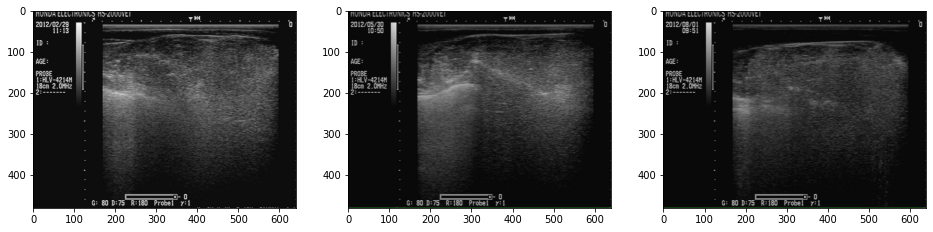

In [ ]:
r = random.sample(my_glob, 3)
r

# Matplotlib black magic
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread(r[0]))

plt.subplot(132)
plt.imshow(cv2.imread(r[1]))

plt.subplot(133)
plt.imshow(cv2.imread(r[2]));  

In [ ]:
print('Number of Observations: ', len(images))

Number of Observations:  516


In [ ]:
full_img_paths = {os.path.basename(x): x for x in images}
dfC['full_path'] = dfC['Id'].map(full_img_paths.get)

In [ ]:
count_per_unique_label = dfC['예상육량'].value_counts()

In [ ]:
num_unique_labels = dfC['예상육량'].nunique()

In [ ]:
df_count_per_unique_label = count_per_unique_label.to_frame()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f75e20b62d0>,
 (array([0, 1, 2]), <a list of 3 Text major ticklabel objects>))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_te

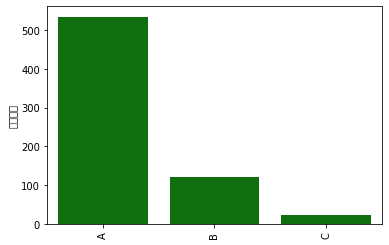

In [ ]:
import seaborn as sns
sns.barplot(x = df_count_per_unique_label.index[:20], y="예상육량", data=df_count_per_unique_label[:20], color = "green"), plt.xticks(rotation = 90)

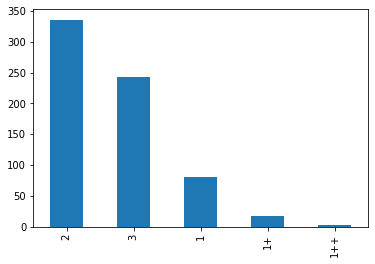

In [ ]:
dfC['예상육질'].value_counts().plot.bar()

In [ ]:
labels = ['A','B','C']
for label in labels:
    dfC[label] = dfC['예상육량'].map(lambda result: 1.0 if label in result else 0)

In [ ]:
dfC.head()

,Id,월령,체중,등지방두께,등심단면적,근내지방도,예상육량,예상육질,full_path,A,B,C
1,KOR002054983848.jpg,25.0,400.0,3.79,61.18,21,A,2,None,1.0,0.0,0.0
2,KOR002054981457.jpg,26.0,400.0,5.85,70.62,21,A,2,None,1.0,0.0,0.0
3,KOR002022005104.jpg,45.0,580.0,12.96,70.04,43,B,1,/content/drive/MyDrive/AI/section4/project/chu...,0.0,1.0,0.0
4,KOR002052587994.jpg,24.0,410.0,3.37,48.42,13,A,3,/content/drive/MyDrive/AI/section4/project/chu...,1.0,0.0,0.0
5,KOR002052588001.jpg,24.0,430.0,4.18,50.66,13,A,3,/content/drive/MyDrive/AI/section4/project/chu...,1.0,0.0,0.0


In [ ]:
dfC['target_vector'] = dfC.apply(lambda target: [target[labels].values], 1).map(lambda target: target[0])

In [ ]:
dfC.head()

,Id,월령,체중,등지방두께,등심단면적,근내지방도,예상육량,예상육질,full_path,A,B,C,target_vector
1,KOR002054983848.jpg,25.0,400.0,3.79,61.18,21,A,2,None,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
2,KOR002054981457.jpg,26.0,400.0,5.85,70.62,21,A,2,None,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
3,KOR002022005104.jpg,45.0,580.0,12.96,70.04,43,B,1,/content/drive/MyDrive/AI/section4/project/chu...,0.0,1.0,0.0,"[0.0, 1.0, 0.0]"
4,KOR002052587994.jpg,24.0,410.0,3.37,48.42,13,A,3,/content/drive/MyDrive/AI/section4/project/chu...,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
5,KOR002052588001.jpg,24.0,430.0,4.18,50.66,13,A,3,/content/drive/MyDrive/AI/section4/project/chu...,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"


In [ ]:
dfC.loc[dfC['full_path'].isna()]

,Id,월령,체중,등지방두께,등심단면적,근내지방도,예상육량,예상육질,full_path,A,B,C,target_vector
1,KOR002054983848.jpg,25.0,400.0,3.79,61.18,21,A,2,None,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
2,KOR002054981457.jpg,26.0,400.0,5.85,70.62,21,A,2,None,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
16,KOR002032992968.jpg,42.0,580.0,11.29,86.31,62,A,1+,None,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
17,KOR002036768060.jpg,42.0,560.0,6.69,64.81,22,A,2,None,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
18,KOR002046754993.jpg,35.0,560.0,7.52,65.94,22,B,2,None,0.0,1.0,0.0,"[0.0, 1.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,KOR000180881888.jpg,78.0,480.0,155.5,73.61,33,C,2,None,0.0,0.0,1.0,"[0.0, 0.0, 1.0]"
674,KOR000144626621.jpg,79.0,470.0,25.08,87.49,33,B,2,None,0.0,1.0,0.0,"[0.0, 1.0, 0.0]"
675,KOR000144626639.jpg,79.0,460.0,19.65,80.99,62,B,1+,None,0.0,1.0,0.0,"[0.0, 1.0, 0.0]"
678,KOR000189406952.jpg,76.0,470.0,8.78,74.98,21,A,2,None,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"


In [ ]:
dfC1 = dfC.dropna()

In [ ]:
dfC1 = dfC1.reset_index(drop=True)

In [ ]:
pd.options.display.max_colwidth = 100

In [ ]:
dfC1['full_path'].duplicated().sum()

38

In [ ]:
dfC1.loc[dfC1['full_path'].duplicated()]

,Id,월령,체중,등지방두께,등심단면적,근내지방도,예상육량,예상육질,full_path,A,B,C,target_vector
48,KOR002033122482.jpg,39.0,530.0,3.37,69.14,13,A,3,/content/drive/MyDrive/AI/section4/project/chunan/KOR002033122482.jpg,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
144,KOR002006523580.jpg,49.0,480.0,5.85,69.65,23,A,2,/content/drive/MyDrive/AI/section4/project/chunan/KOR002006523580.jpg,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
150,KOR002006512665.jpg,48.0,450.0,9.61,64.43,31,A,2,/content/drive/MyDrive/AI/section4/project/chunan/KOR002006512665.jpg,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
153,KOR002006505875.jpg,49.0,420.0,4.62,62.68,31,A,2,/content/drive/MyDrive/AI/section4/project/chunan/KOR002006505875.jpg,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
160,KOR002049249232.jpg,27.0,630.0,13.38,86.56,41,B,1,/content/drive/MyDrive/AI/section4/project/chunan/KOR002049249232.jpg,0.0,1.0,0.0,"[0.0, 1.0, 0.0]"
164,KOR002012584535.jpg,48.0,540.0,5.43,67.02,23,A,2,/content/drive/MyDrive/AI/section4/project/chunan/KOR002012584535.jpg,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
165,KOR002020923058.jpg,47.0,600.0,18.4,83.29,31,C,2,/content/drive/MyDrive/AI/section4/project/chunan/KOR002020923058.jpg,0.0,0.0,1.0,"[0.0, 0.0, 1.0]"
225,KOR002033030480.jpg,38.0,570.0,6.69,84.61,33,A,2,/content/drive/MyDrive/AI/section4/project/chunan/KOR002033030480.jpg,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
226,KOR002026771676.jpg,43.0,550.0,5.87,75.04,31,A,2,/content/drive/MyDrive/AI/section4/project/chunan/KOR002026771676.jpg,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
227,KOR002013703533.jpg,67.0,600.0,6.7,86.81,32,A,2,/content/drive/MyDrive/AI/section4/project/chunan/KOR002013703533.jpg,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"


In [ ]:
dfC1 = dfC1.drop_duplicates(['full_path'], ignore_index=True)

In [ ]:
dfC1

,Id,월령,체중,등지방두께,등심단면적,근내지방도,예상육량,예상육질,full_path,A,B,C,target_vector
0,KOR002022005104.jpg,45.0,580.0,12.96,70.04,43,B,1,/content/drive/MyDrive/AI/section4/project/chu...,0.0,1.0,0.0,"[0.0, 1.0, 0.0]"
1,KOR002052587994.jpg,24.0,410.0,3.37,48.42,13,A,3,/content/drive/MyDrive/AI/section4/project/chu...,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
2,KOR002052588001.jpg,24.0,430.0,4.18,50.66,13,A,3,/content/drive/MyDrive/AI/section4/project/chu...,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
3,KOR002054981393.jpg,24.0,420.0,6.27,62.2,13,A,3,/content/drive/MyDrive/AI/section4/project/chu...,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
4,KOR002054981408.jpg,23.0,420.0,5.43,56.49,12,A,3,/content/drive/MyDrive/AI/section4/project/chu...,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,KOR002021543187.jpg,50.0,650.0,16.72,80.17,12,C,3,/content/drive/MyDrive/AI/section4/project/chu...,0.0,0.0,1.0,"[0.0, 0.0, 1.0]"
488,KOR002021541760.jpg,47.0,650.0,6.69,82.58,33,A,2,/content/drive/MyDrive/AI/section4/project/chu...,1.0,0.0,0.0,"[1.0, 0.0, 0.0]"
489,KOR002028794856.jpg,40.0,600.0,10.45,81.16,42,B,1,/content/drive/MyDrive/AI/section4/project/chu...,0.0,1.0,0.0,"[0.0, 1.0, 0.0]"
490,KOR000189396680.jpg,79.0,600.0,16.72,87.59,42,B,1,/content/drive/MyDrive/AI/section4/project/chu...,0.0,1.0,0.0,"[0.0, 1.0, 0.0]"


In [ ]:
dfC1.to_csv('chunan.csv')

In [ ]:
new_df = dfC1.copy()

In [ ]:
files_list = dfC1['full_path'].tolist()

In [ ]:
labelB = (dfC1[labels].sum(axis=1)>0).tolist()
labelB = np.array(labelB, dtype=int)

In [ ]:
labelB.shape

(492,)

In [ ]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path, shape):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=shape)
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)/255
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths, shape):
    list_of_tensors = [path_to_tensor(img_path, shape) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

train_labels = labelB[:424][:, np.newaxis]
valid_labels = labelB[424:477][:, np.newaxis]
test_labels = labelB[477:][:, np.newaxis]

img_shape = (64, 64)
train_tensors = paths_to_tensor(files_list[:424], shape = img_shape)
valid_tensors = paths_to_tensor(files_list[424:477], shape = img_shape)
test_tensors = paths_to_tensor(files_list[477:], shape = img_shape)

100%|██████████| 15/15 [00:00<00:00, 103.92it/s]


In [ ]:

import time
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense
from keras.models import Sequential, Model
from keras.layers import BatchNormalization
from keras import regularizers, applications, optimizers, initializers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import resnet
from tensorflow.keras.applications.vgg16 import VGG16

# VGG16
# resnet50.ResNet50
# inception_v3.InceptionV3 299x299
# inception_resnet_v2.InceptionResNetV2 299x299

base_model = VGG16(weights='imagenet', 
                                include_top=False, 
                                input_shape=train_tensors.shape[1:])

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dropout(0.2))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dropout(0.2))
add_model.add(Dense(50, activation='relu'))
add_model.add(Dropout(0.2))
add_model.add(Dense(1, activation='sigmoid'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))

model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dfC1, test_size = 0.2, random_state = 42)

# quick check to see that the training and test set were split properly
print('training set - # of observations: ', len(train_set))
print('test set - # of observations): ', len(test_set))
print('prior, full data set - # of observations): ', len(dfC1))

training set - # of observations:  393
test set - # of observations):  99
prior, full data set - # of observations):  492


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)

In [ ]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    #df_gen.filepaths.extend(df_gen.filenames)
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [ ]:
image_size = (256, 256) # image re-sizing target
train_gen = flow_from_dataframe(data_gen, train_set, 
                                path_col = 'full_path', y_col = 'target_vector', target_size = image_size, 
                                color_mode = 'grayscale', batch_size = 32)
valid_gen = flow_from_dataframe(data_gen, test_set, 
                                path_col = 'full_path', y_col = 'target_vector', target_size = image_size, 
                                color_mode = 'grayscale', batch_size = 128)

# define test sets
test_X, test_Y = next(flow_from_dataframe(data_gen, test_set, 
                                          path_col = 'full_path', y_col = 'target_vector', target_size = image_size, 
                                          color_mode = 'grayscale', batch_size = 256));

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 393 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 99 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 99 images


IndexError: ignored